# Worldwide COVID-19 Data in relation to World Population

Authored by: Nuno Filipe Maranhão dos Reis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import Image

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531     1703     1828     1939     2171  
1      712      726      736      750      766      773  
2     3256     3382     3517     3649     3848     4006  
3      738      738      743      743      743      745  
4       25       26       27       27       27       27  

[5 rows x 104 columns]

In [5]:
# World Population Data from: https://datahub.io/JohnSnowLabs/population-figures-by-country#resource-population-figures-by-country_zip
popData = pd.read_csv("population-figures-by-country-csv_csv.csv")

In [6]:
popData = popData.drop(popData.iloc[:, 1:58], axis=1)
popData.set_index("Country", inplace=True)
popData = popData.sum(axis = 1)
popData = popData.sort_values(ascending=False)

popData.head()

Country
World                  7.442136e+09
IDA & IBRD total       6.271593e+09
Low & middle income    6.247923e+09
Middle income          5.592833e+09
IBRD only              4.697247e+09
dtype: float64

# Data Handling for Easier Presentation

We're gonna handle the data a bit for easier graph managing. However, we're preserving the initial dataframe for QGIS use later.

In [7]:
data = df.drop(columns=['Province/State', 'Lat', 'Long'])
data[data.duplicated(['Country/Region'])]

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
9         Australia        0        0        0        0        3        4   
10        Australia        0        0        0        0        0        0   
11        Australia        0        0        0        0        0        0   
12        Australia        0        0        0        0        0        0   
13        Australia        0        0        0        0        0        0   
..              ...      ...      ...      ...      ...      ...      ...   
250  United Kingdom        0        0        0        0        0        0   
251  United Kingdom        0        0        0        0        0        0   
256     Netherlands        0        0        0        0        0        0   
258  United Kingdom        0        0        0        0        0        0   
259          France        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
9          4        4        4  ...     2969     2971     2976     2982   
10         0        0        0  ...       28       28       28       28   
11         0        1        3  ...     1024     1024     1026     1026   
12         0        0        0  ...      437      438      438      438   
13         0        0        0  ...      201      205      207      207   
..       ...      ...      ...  ...      ...      ...      ...      ...   
250        0        0        0  ...        5        5        5        5   
251        0        0        0  ...       11       11       11       11   
256        0        0        0  ...        5        5        5        5   
258        0        0        0  ...       11       11       12       13   
259        0        0        0  ...        1        1        1        1   

     4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
9       2994     3002     3004     3016     3016     3025  
10        28       28       28       28       28       28  
11      1026     1030     1033     1034     1033     1033  
12       438      438      438      438      438      438  
13       207      212      214      218      219      221  
..       ...      ...      ...      ...      ...      ...  
250        6        6        6        6        6        6  
251       11       11       12       12       12       12  
256        5        5        5        5        5        5  
258       13       13       13       13       13       13  
259        1        1        1        1        1        1  

[79 rows x 101 columns]

In [8]:
data = data.groupby(['Country/Region']).sum().reset_index()
data = data.rename(columns={"Country/Region": "Country"})
data.set_index("Country", inplace=True)

data.loc['US']

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
4/26/20     965785
4/27/20     988197
4/28/20    1012582
4/29/20    1039909
4/30/20    1069424
Name: US, Length: 100, dtype: int64

Now, to visualize how many COVID cases have been reported total in each country, we'll make a sum of all columns and store them in another dataframe but only after summing all the duplicates.

In [9]:
length = len(data.columns.tolist())
date = data.columns.tolist()[-1]

sumdata = data[date]
sumdata = sumdata.sort_values(ascending=True)

sumdata

Country
Comoros                   1
Yemen                     6
Western Sahara            6
Bhutan                    7
Papua New Guinea          8
                     ...   
France               167299
United Kingdom       172481
Italy                205463
Spain                213435
US                  1069424
Name: 4/30/20, Length: 187, dtype: int64

As we can see, the growth of the number of infected in relation to the country appears to scale exponentially, so we'll build a graph with a logarithmic scale

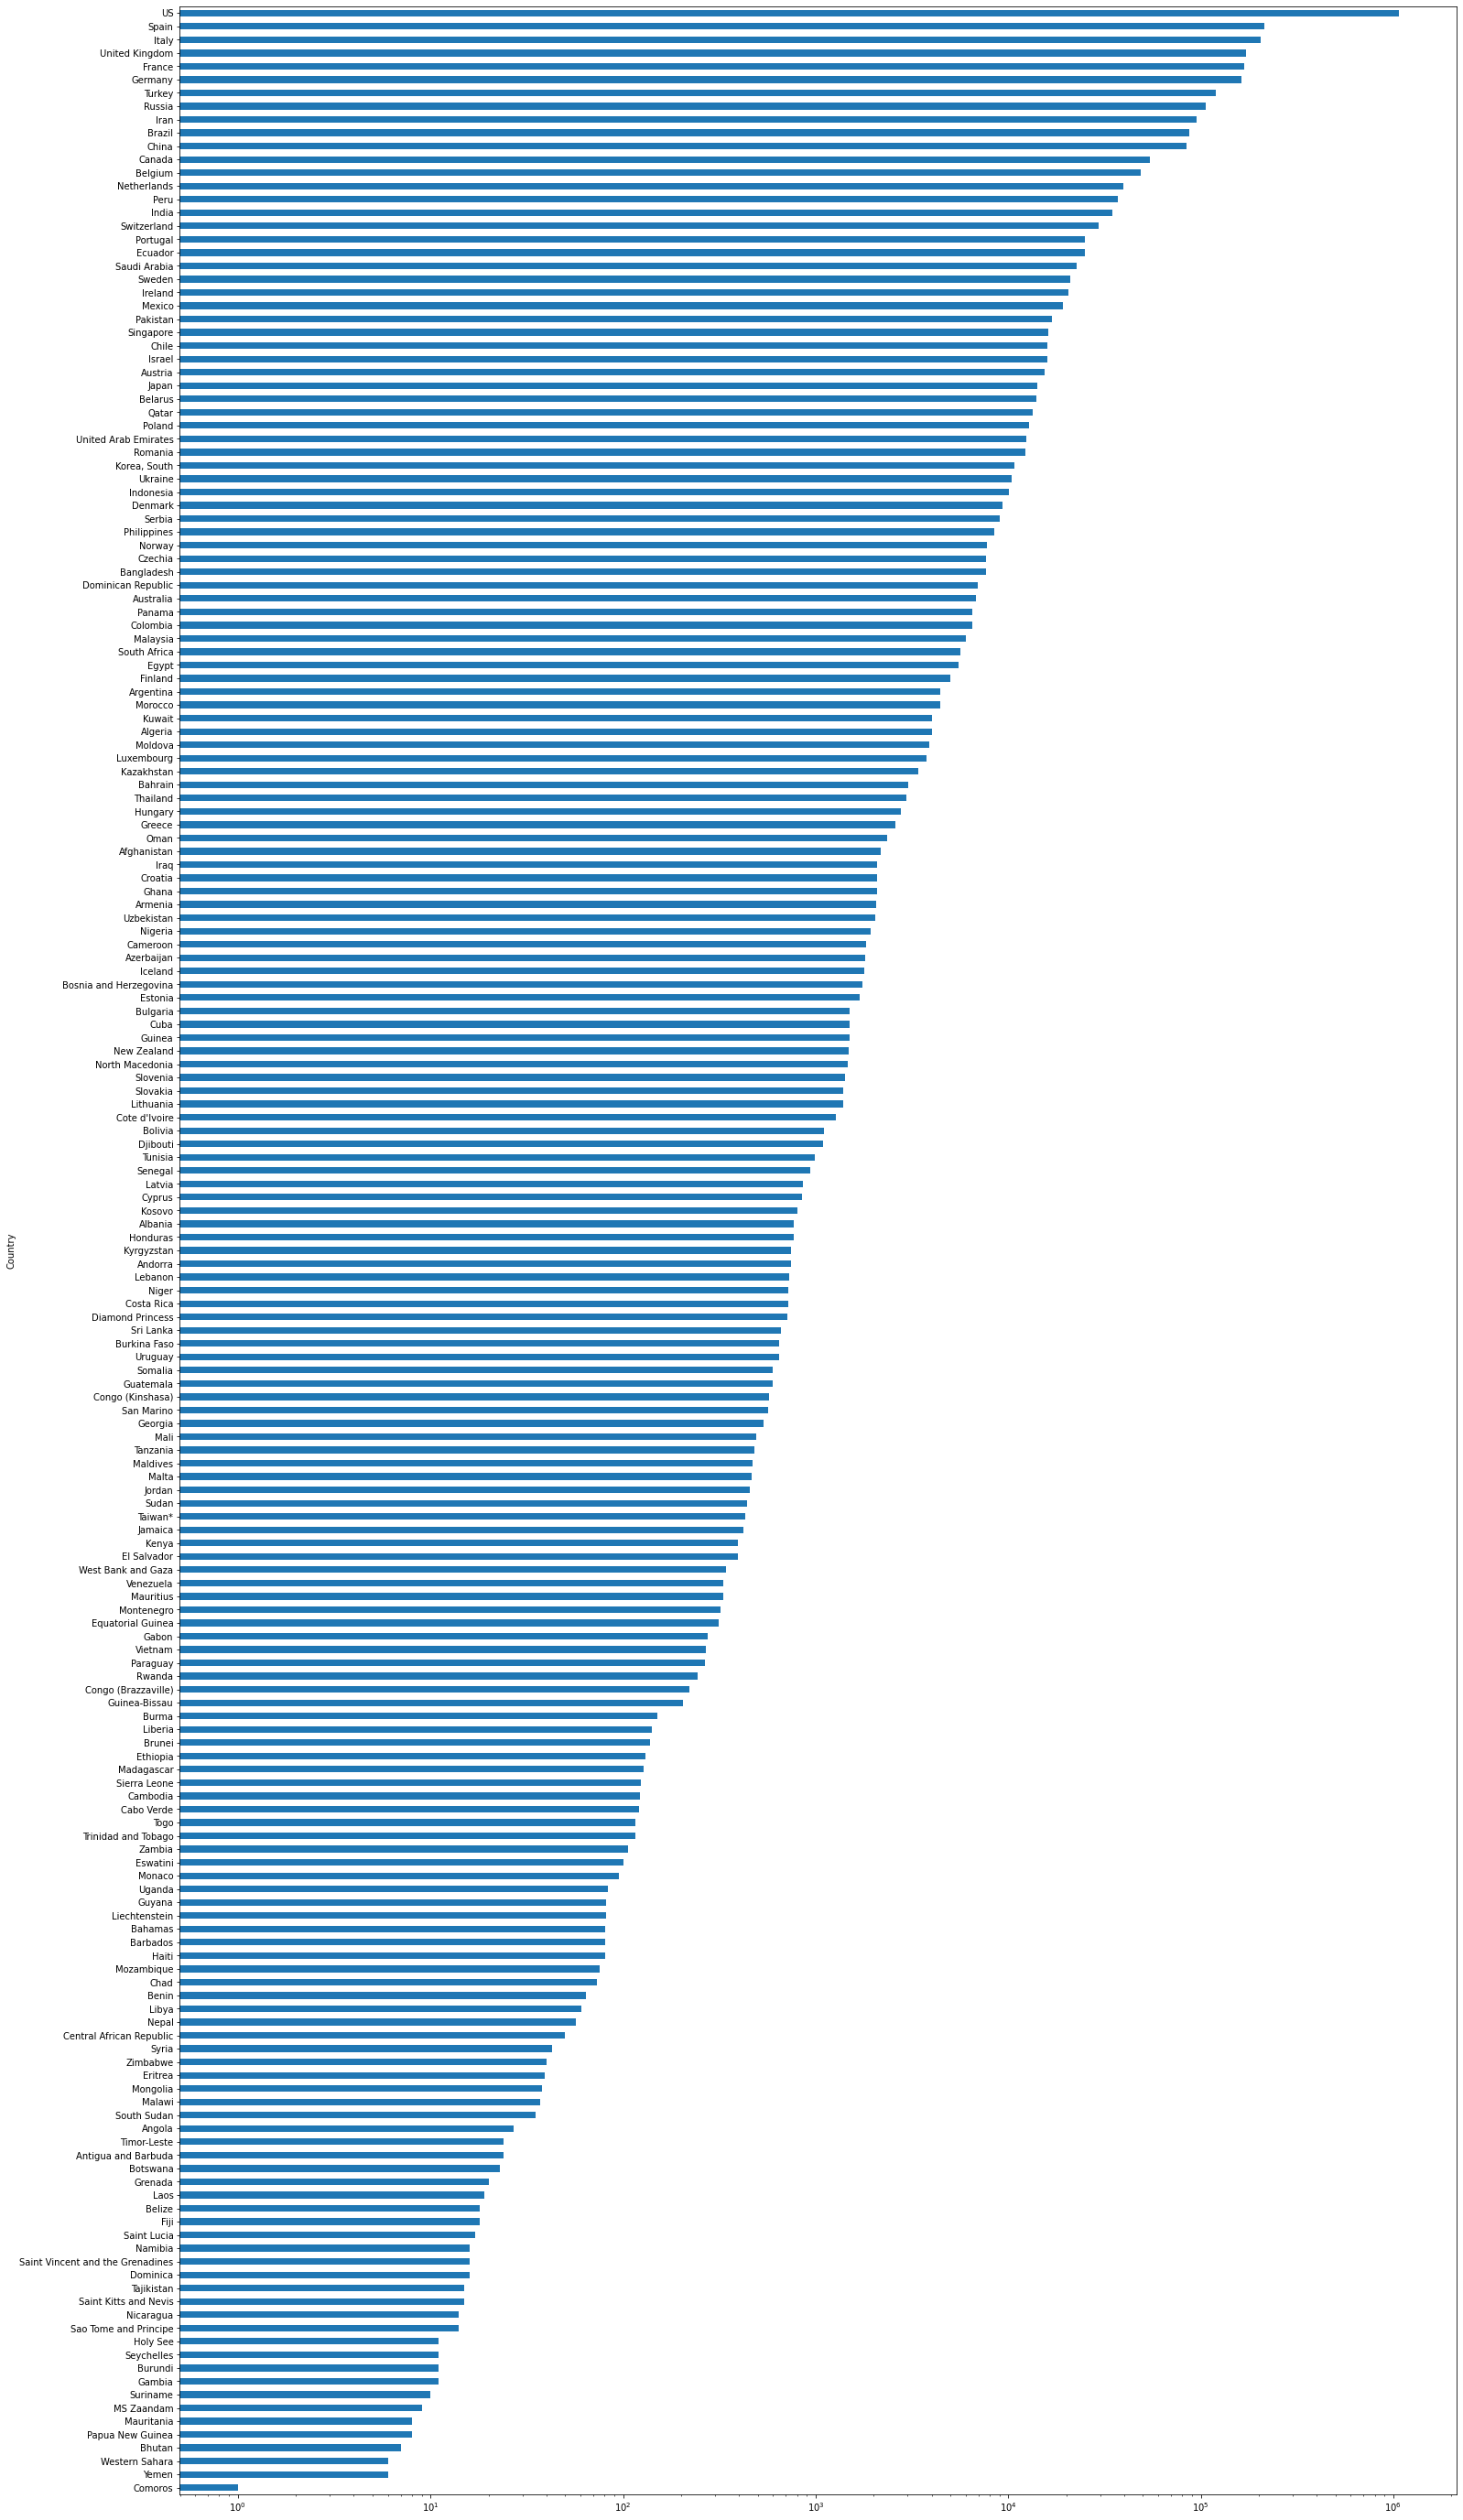

In [10]:
sumdata.plot.barh(figsize=(25,50))
plt.xscale("log")
plt.show()

# Studying the most effected countries since January

First, we're going to take a look at how the landscape has shifted over time via some animated bar graphs and, afterwards, we're going to explore the growth of cases per day in the US, Italy and China.

In [11]:
data

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country                                                                    
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  4/21/20  4/22/20  \
Country                                                 ...                     
Afghanistan               0        0        0        0  ...     1092     1176   
Albania                   0        0        0        0  ...      609      634   
Algeria                   0        0        0        0  ...     2811     2910   
Andorra                   0        0        0        0  ...      717      723   
Angola                    0        0        0        0  ...       24       25   
...                     ...      ...      ...      ...  ...      ...      ...   
West Bank and Gaza        0        0        0        0  ...      466      474   
Western Sahara            0        0        0        0  ...        6        6   
Yemen                     0        0        0        0  ...        1        1   
Zambia                    0        0        0        0  ...       70       74   
Zimbabwe                  0        0        0        0  ...       28       28   

                    4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  \
Country                                                                    
Afghanistan            1279     1351     1463     1531     1703     1828   
Albania                 663      678      712      726      736      750   
Algeria                3007     3127     3256     3382     3517     3649   
Andorra                 723      731      738      738      743      743   
Angola                   25       25       25       26       27       27   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza      480      484      342      342      342      343   
Western Sahara            6        6        6        6        6        6   
Yemen                     1        1        1        1        1        1   
Zambia                   76       84       84       88       88       95   
Zimbabwe                 28       29       31       31       32       32   

                    4/29/20  4/30/20  
Country                               
Afghanistan            1939     2171  
Albania                 766      773  
Algeria                3848     4006  
Andorra                 743      745  
Angola                   27       27  
...                     ...      ...  
West Bank and Gaza      344      344  
Western Sahara            6        6  
Yemen                     6        6  
Zambia                   97      106  
Zimbabwe                 32       40  

[187 rows x 100 columns]

In [12]:
def draw_barchart(col):
    dff = data.iloc[:,col].sort_values(ascending=True).tail(10)
    ax.clear()
    ax.barh(dff.index, dff.values)
    dx = dff.values.max() / 200
    for i, (value, name) in enumerate(zip(dff.values, dff.index)):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, list(data.columns)[col], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID cases by country since 22/1/2020',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)

This next part is animated though Github does not show it for some reason.

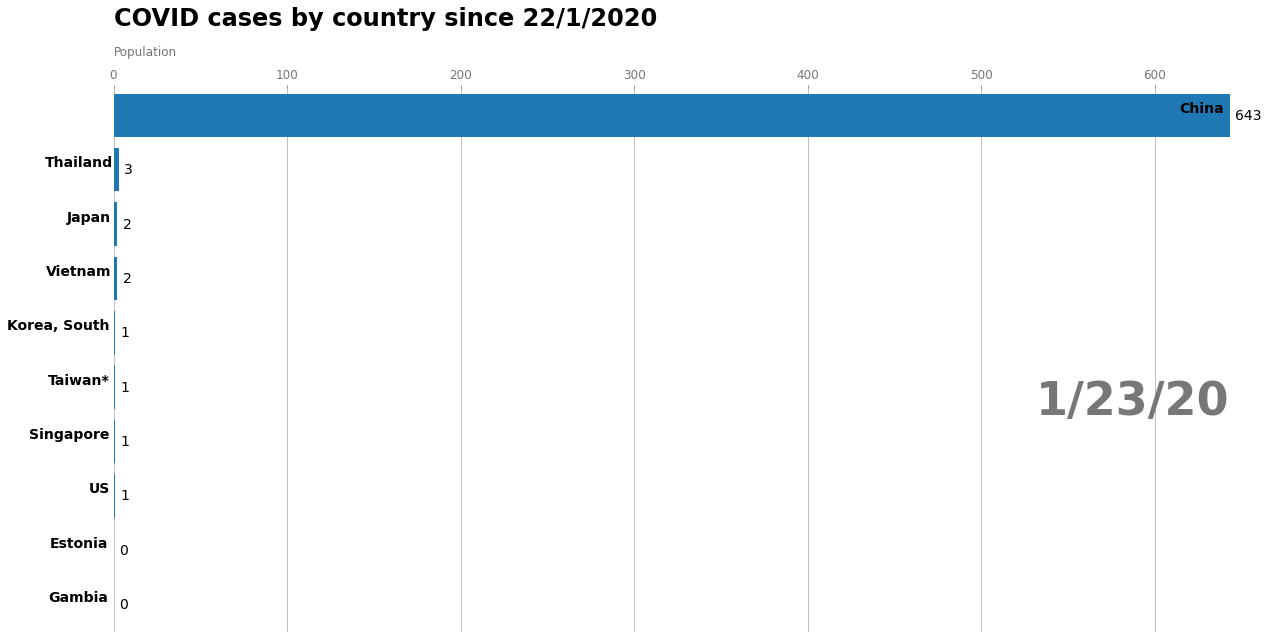

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, length))
HTML(animator.to_jshtml())

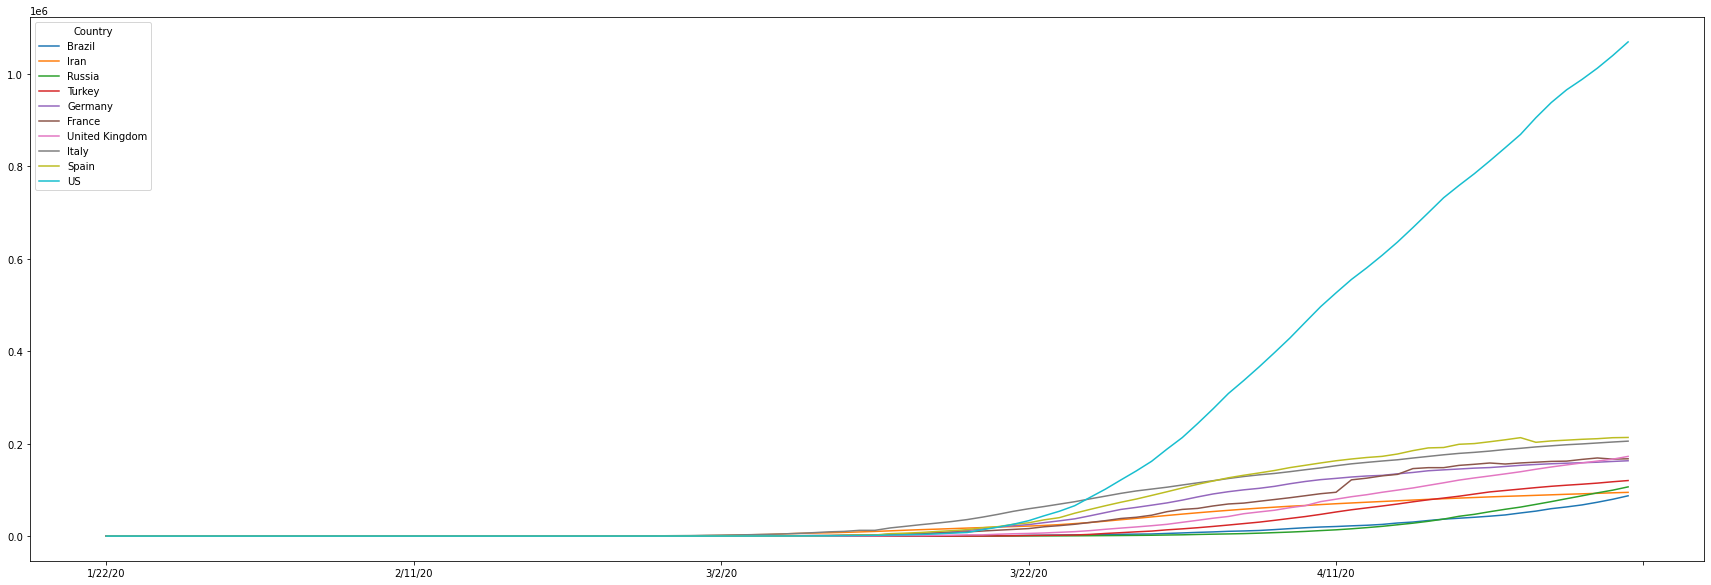

In [14]:
dff = data.sort_values(by=date, ascending=True).tail(10)
dff = dff.transpose()
dff.plot.line(figsize=(30,10))

# United States

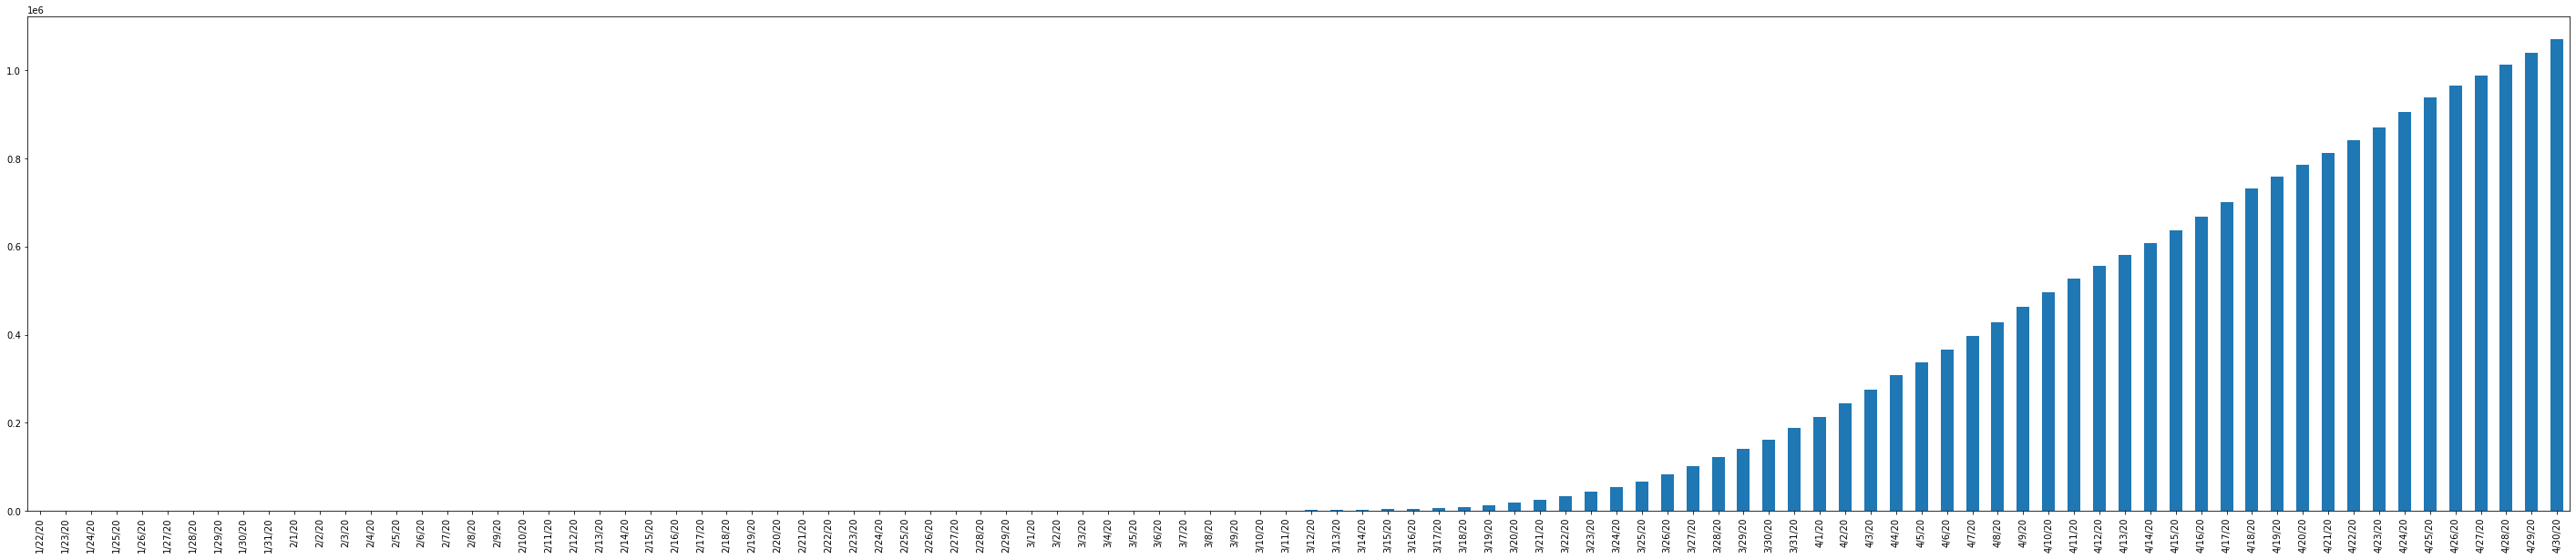

In [15]:
tempData = data.loc['US']
tempData.plot.bar(figsize=(50,10))
plt.show()

# China

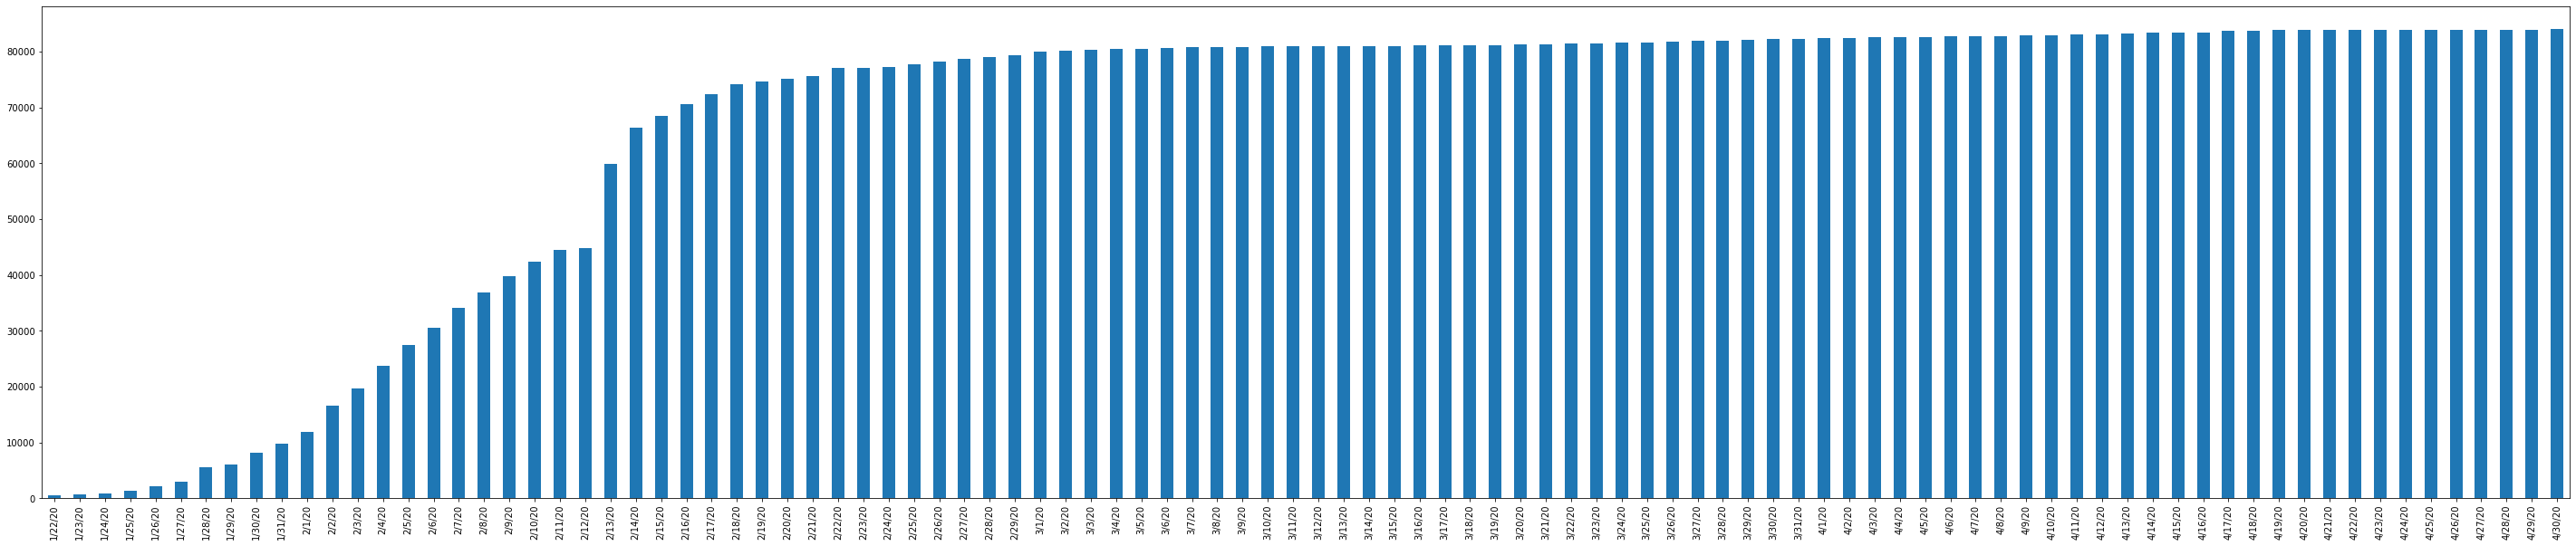

In [16]:
tempData = data.loc['China']
tempData.plot.bar(figsize=(50,10))
plt.show()

# Italy

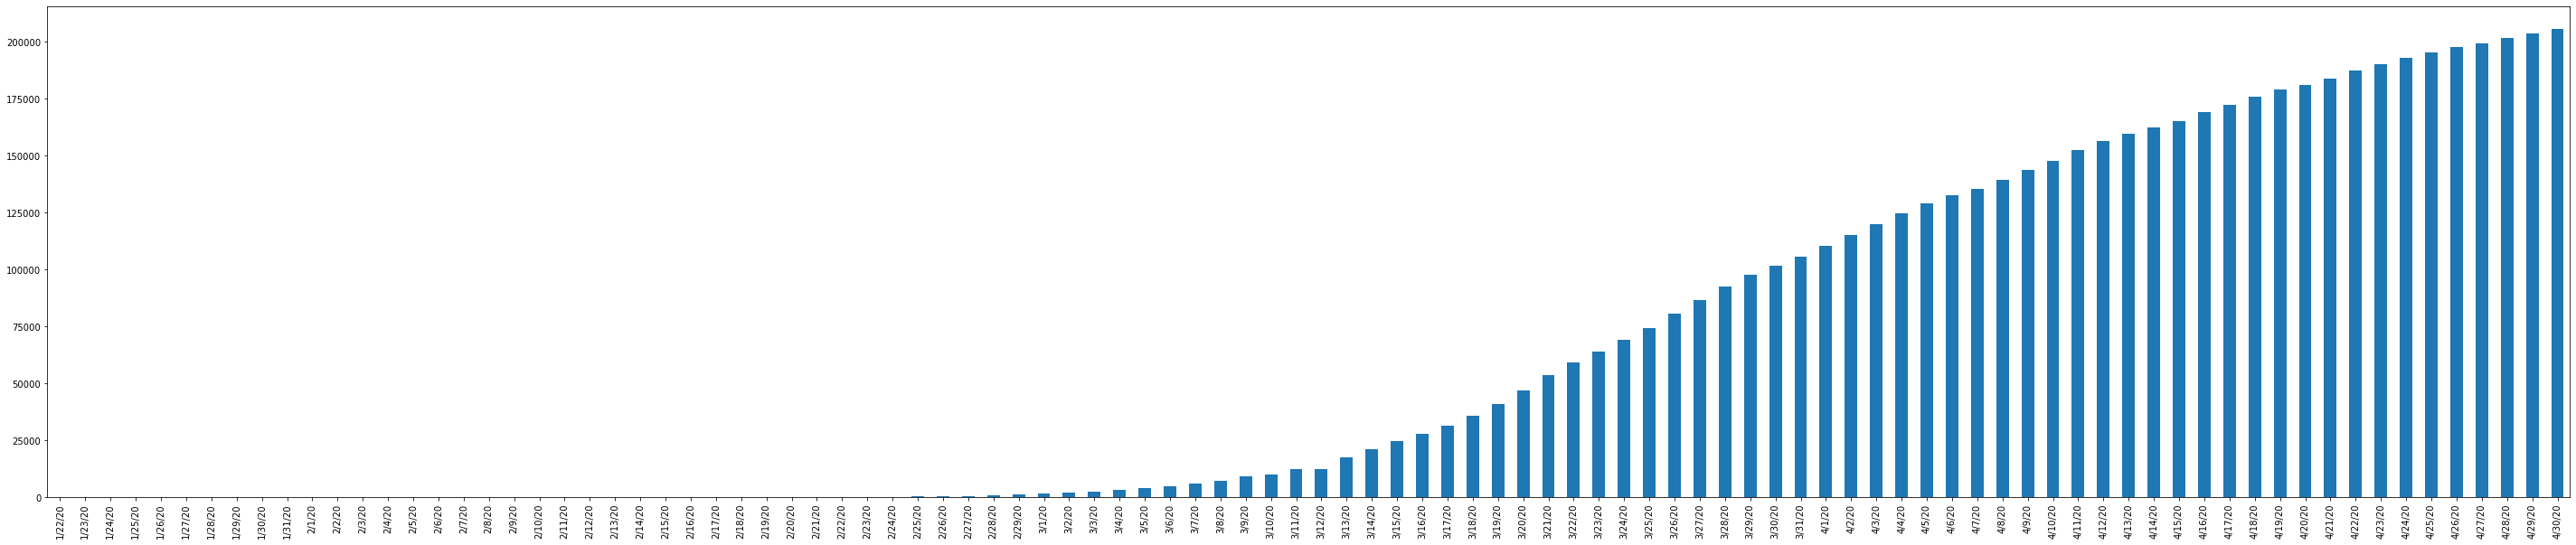

In [17]:
tempData = data.loc['Italy']
tempData.plot.bar(figsize=(50,10))
plt.show()

# COVID-19 vs. World Pop (2016)

More up to date models are available but require extensive treatment outside this notebook, mainly via excel spreadsheets.

In [18]:
sumdata = sumdata.to_frame()
popData = popData.to_frame()

df_inner = pd.merge(sumdata, popData, on='Country', how='inner')
df_inner.head()

4/30/20          0
Country                             
Comoros                 1   795601.0
Bhutan                  7   797765.0
Papua New Guinea        8  8084991.0
Mauritania              8  4301018.0
Suriname               10   558368.0

In [19]:
df_inner=df_inner.rename(columns={date: "TotalCovid", 0: "TotalPop"})
df_inner['%Covid/Pop'] = (df_inner['TotalCovid']/df_inner['TotalPop'])*100
df_inner = df_inner.drop('Eritrea',axis=0)
df_inner = df_inner.sort_values(by='%Covid/Pop',ascending=False)
df_inner.head()

TotalCovid   TotalPop  %Covid/Pop
Country                                      
San Marino         569    33203.0    1.713701
Andorra            745    77281.0    0.964014
Luxembourg        3784   582972.0    0.649088
Iceland           1797   334252.0    0.537618
Qatar            13409  2569804.0    0.521791

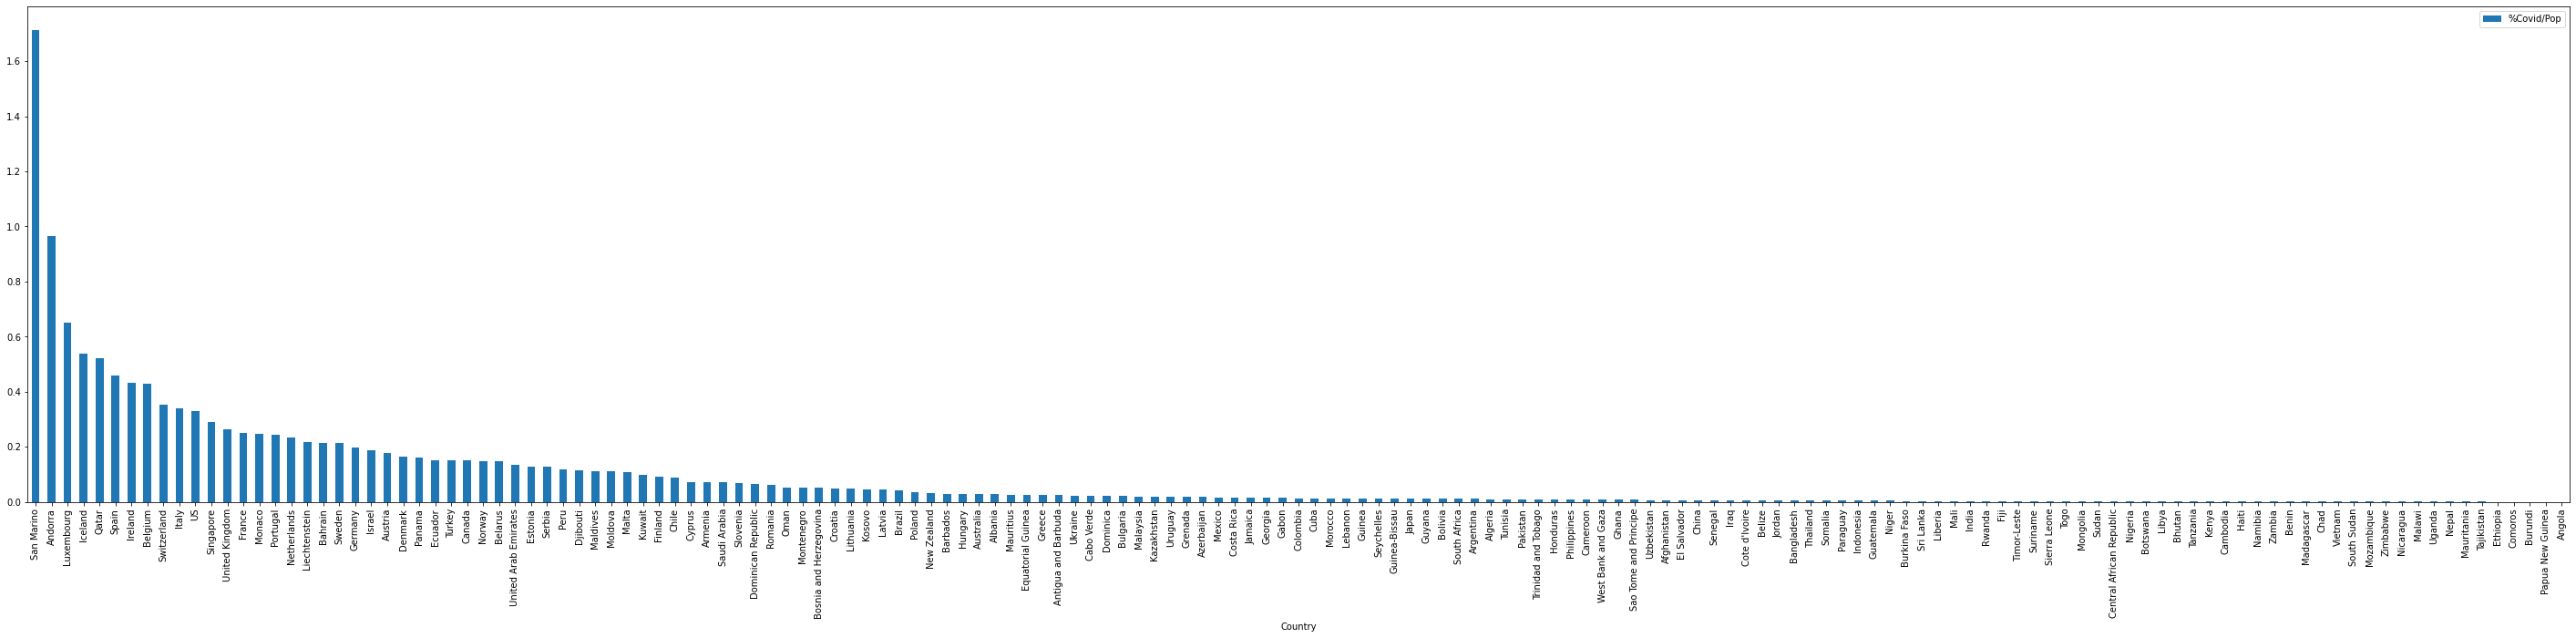

In [20]:
df_inner.plot.bar(y='%Covid/Pop', figsize=(50,10))
plt.show()

In [21]:
dfp = df_inner.sort_values(by='TotalPop',ascending=True).tail(10)
dfp

TotalCovid      TotalPop  %Covid/Pop
Country                                         
Japan            14088  1.269945e+08    0.011093
Mexico           19224  1.275404e+08    0.015073
Bangladesh        7667  1.629516e+08    0.004705
Nigeria           1932  1.859896e+08    0.001039
Pakistan         16817  1.932035e+08    0.008704
Brazil           87187  2.076529e+08    0.041987
Indonesia        10118  2.611155e+08    0.003875
US             1069424  3.231275e+08    0.330960
India            34863  1.324171e+09    0.002633
China            83956  1.378665e+09    0.006090

In [22]:
dfc = df_inner.sort_values(by='TotalCovid',ascending=True).tail(10)
dfc

TotalCovid      TotalPop  %Covid/Pop
Country                                             
Canada               54457  3.628642e+07    0.150075
China                83956  1.378665e+09    0.006090
Brazil               87187  2.076529e+08    0.041987
Turkey              120204  7.951243e+07    0.151176
Germany             163009  8.266768e+07    0.197186
France              167299  6.689611e+07    0.250088
United Kingdom      172481  6.563724e+07    0.262779
Italy               205463  6.060059e+07    0.339045
Spain               213435  4.644396e+07    0.459554
US                 1069424  3.231275e+08    0.330960

Relation between Population and Covid Spread

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1B86F910>,
      dtype=object)

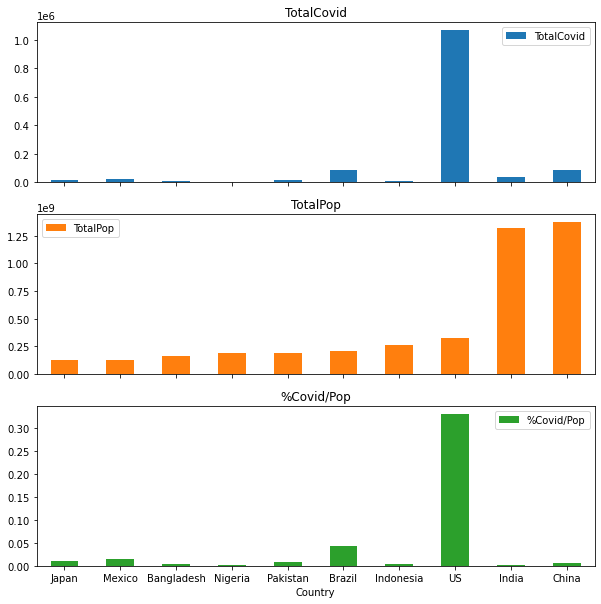

In [23]:
dfp.plot.bar(rot=0,subplots=True,figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18B42BD0>,
      dtype=object)

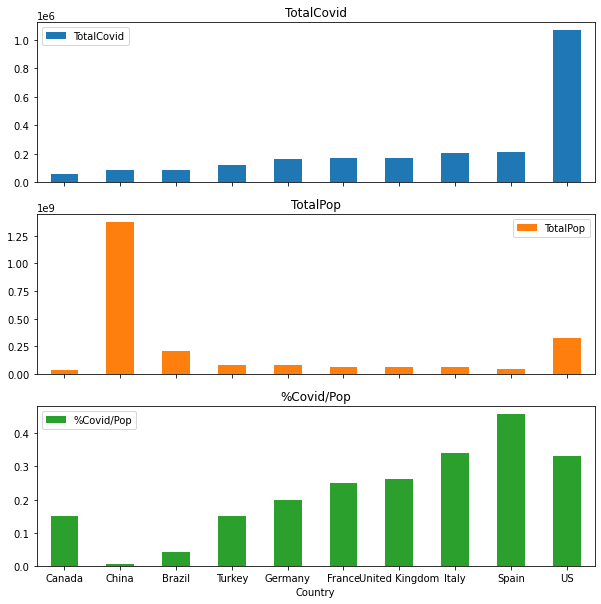

In [24]:
dfc.plot.bar(rot=0,subplots=True,figsize=(10,10))

Now, we print the Data to a csv to use in a map for QGIS

In [25]:
cov = df.loc[:,['Country/Region','Lat','Long']]
cov = cov.rename(columns={"Country/Region": "Country"})
cov.drop_duplicates(subset="Country",keep="first",inplace=True)
cov = pd.merge(df_inner, cov, on='Country', how='inner')
cov.to_csv("QGIS\covid.csv")

An illustritive map detailing the percentage of infected by population - Darker = more infected

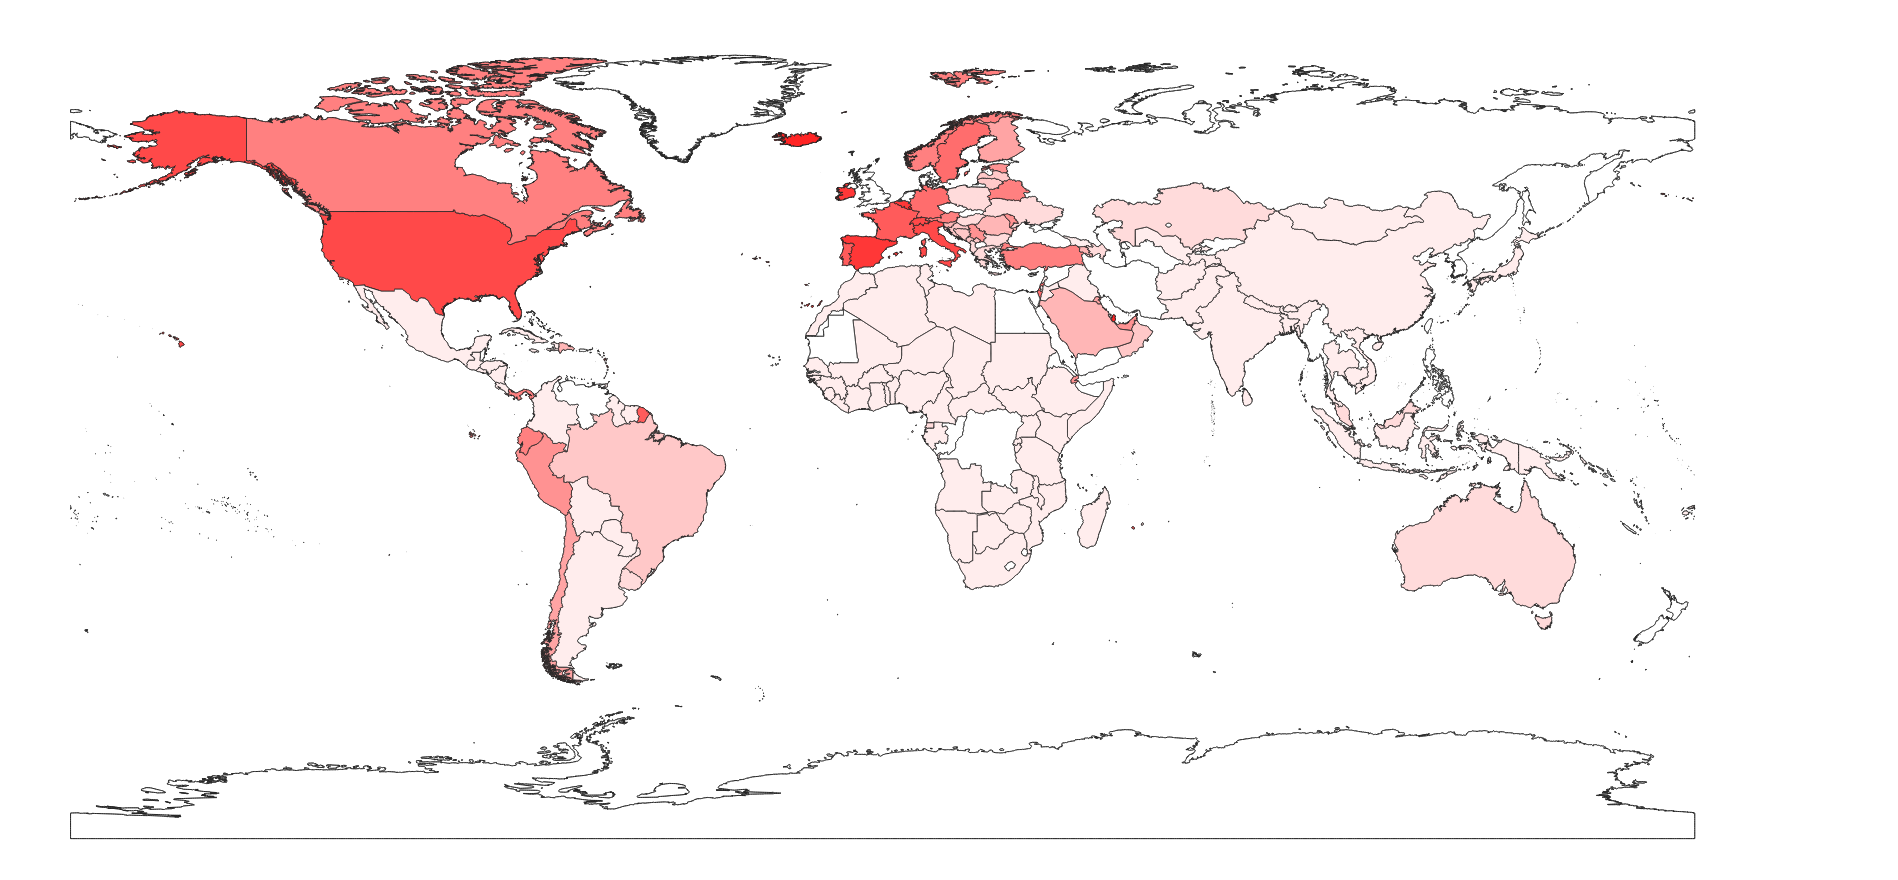

In [26]:
Image(filename='QGIS\covid.png') 